In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1b85b8','#ae5a41','#559e83','#c3cb71','#fb9062'])


## 3a09 ch3

deltaI/2Ic = 0.6
deltaI = 7.05


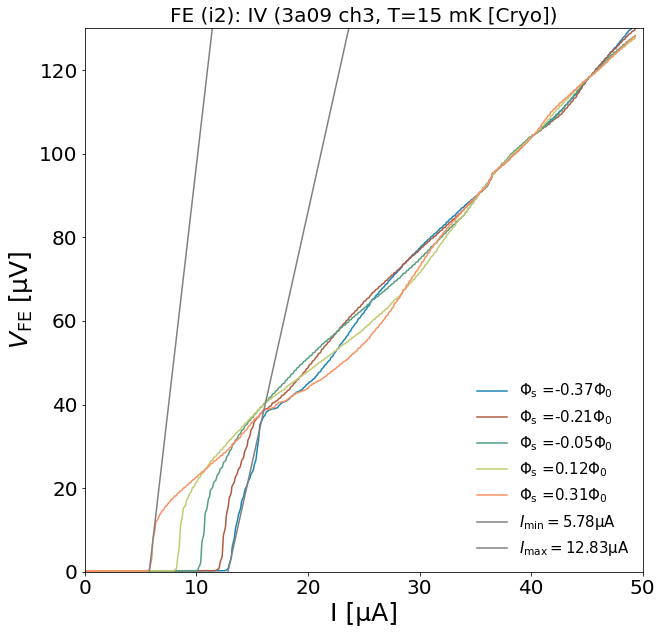

In [9]:
chip='3a09'
dev='Cryo'
temp='15 mK'
Ib_gen=50
Phib_gen=200
x=np.linspace(0, 50, 5000)

ibmax=12.9
dvmax=30.4
Mf=43.54
typ='i2'
phi=np.array([-16.22,-9.1,-1.98,5.15,13.29])

#IV

t, gen, V = np.loadtxt(open('IV_1_' + f'{chip}' + '_ch3.csv').readlines()[:-2], skiprows=4, usecols=(0,1,2), delimiter = ',', unpack=True)
t2, gen2, V2 = np.loadtxt(open('IV_2_' + f'{chip}' + '_ch3.csv').readlines()[:-2], skiprows=4, usecols=(0,1,2), delimiter = ',', unpack=True)
t3, gen3, V3 = np.loadtxt(open('IV_3_' + f'{chip}' + '_ch3.csv').readlines()[:-2], skiprows=4, usecols=(0,1,2), delimiter = ',', unpack=True)
t4, gen4, V4 = np.loadtxt(open('IV_4_' + f'{chip}' + '_ch3.csv').readlines()[:-2], skiprows=4, usecols=(0,1,2), delimiter = ',', unpack=True)
t5, gen5, V5 = np.loadtxt(open('IV_5_' + f'{chip}' + '_ch3.csv').readlines()[:-2], skiprows=4, usecols=(0,1,2), delimiter = ',', unpack=True)

plt.plot((gen+0.5)*Ib_gen, (V/2)*1000-abs(min((V/2)*1000)), label=r'$\Phi_{\rm s}$ =' + f'{round(phi[0]/Mf, 2)}' + '$\Phi_0$')
plt.plot((gen2+0.5)*Ib_gen, (V2/2)*1000-abs(min((V2/2)*1000)), label=r'$\Phi_{\rm s}$ =' + f'{round(phi[1]/Mf, 2)}' + '$\Phi_0$')
plt.plot((gen3+0.5)*Ib_gen, (V3/2)*1000-abs(min((V/2)*1000)), label=r'$\Phi_{\rm s}$ =' + f'{round(phi[2]/Mf, 2)}' + '$\Phi_0$')
plt.plot((gen4+0.5)*Ib_gen, (V4/2)*1000-abs(min((V/2)*1000)), label=r'$\Phi_{\rm s}$ =' + f'{round(phi[3]/Mf, 2)}' + '$\Phi_0$')
plt.plot((gen5+0.5)*Ib_gen, (V5/2)*1000-abs(min((V/2)*1000)), label=r'$\Phi_{\rm s}$ =' + f'{round(phi[4]/Mf, 2)}' + '$\Phi_0$')

#determine Rn
Rn=2.8
off=9
#plt.plot(x, Rn*x-off, label=r'$R_{\rm N}=' + f'{Rn}' + '\Omega$', c='0.5')

#determine deltaI
Ic=5.84
a=23
biasa=133
Imin_index=np.argmin(abs(a*x-biasa))
Imin=x[Imin_index]
b=12
biasb=154
Imax_index=np.argmin(abs(b*x-biasb))
Imax=x[Imax_index]
plt.plot(x, a*x-biasa, label=r'$I_{\rm min}=' + f'{round(Imin,2)}' + r'\rm \mu A$', c='0.5')
plt.plot(x, b*x-biasb, label=r'$I_{\rm max}=' + f'{round(Imax,2)}' + r'\rm \mu A$', c='0.5')
deltaI=round(Imax,2)-round(Imin,2)
print(f'deltaI/2Ic = {round(deltaI/(2*Ic),2)}')
print(f'deltaI = {round(deltaI,2)}')

#show Ibmax, DVmax
#plt.axvline(x=ibmax, ymin=0, ymax=0.4, label=r'$I_{\rm b,max}'+ f'= {ibmax}' + r'\ \rm \mu A$', ls='dotted', c='c') 
#plt.axhline(y=dvmax, xmin=0, xmax=0.4, label=r'$DV_{\rm max}'+ f'= {dvmax}' + r'\ \rm \mu V$', ls='dotted', c='r') 

plt.xlabel('I [µA]')
plt.ylabel(r'$V_{\rm FE}$ [µV]')
plt.ylim(0,130)
plt.xlim(0,50)
#plt.ylim(0,40)
#plt.xlim(0,20)
plt.title('FE (' + f'{typ}' + '): IV (' + f'{chip}' + ' ch3, T=' + f'{temp}' + ' [' + f'{dev}' + '])')
plt.legend(frameon=False)
plt.savefig('IV_' + f'{chip}' + '_ch3.pdf')